# MTH448 Project5

## Let's Review

# Introduction

In the digital age, movies as a great source of entertainment have brought us countless beautiful stories and experiences of visual effects. It also demonstrates the progress and development of technology. Usually, everyone has different feelings and comments about each movie or even a particular plot. Therefore, online movie reviews have become a very interesting thing, where different people decide whether a movie is positive or negative based on their own experience. 

In project5, we can try to predict whether a movie is positive or negative based on the text of the reviews in the database, but only based on the few reviews. Of course, it is neither one-sided nor objective to decide whether a movie is positive or negative based only on a few ratings. Therefore, we will use two theorems, $Bayes' Theorem$ and $Naive Bayes Classifier$, to help us predict whether a movie is positive or negative in a relatively fair and reasonable way.These two theorems need to deal with a large database of 25,000 movie reviews, which will be labeled positive and negative respectively. markers. We calculate the frequency of word occurrences by removing trivial words using the provided list of stop words and avoid the problem of words that have not been seen by applying Laplace smoothing. We can also try to visualize the most frequent words in positive and negative comments, thus showing interesting human imagery to help people gain insight into the linguistic characteristics of each emotion through text.







Ultimately, our goal is to develop an effective classifier that can help us analyze its accuracy and misclassification. Through this process, we can get a real sense of how we

## Know about Bayes' Theorem and Naive Bayes Classifier

Before we begin then, we need to briefly understand what Baye's Theorem and Naive Bayes Classifer are and how we will apply them.

### Bayes' Theorem

As we mentioned Bayes' Theorem before, we still can review a liitle bit about Bayes theorem.
In Bayes theorem $\bigg(P(A|B)=\frac{P(B|A)P(A)}{P(B)}\bigg)$, they usually have their own function.

* $P(A|B)$ is called the posterior because it is our degree of belief in event $A$ after seeing data.
* $P(A)$ is called the prior because it is our degree of belief in event $A$ before aka prior to seeing data.
* $P(B|A)$ is called the likelyhood because it represents the likelihood that our data (event B) occured given the phenomenon of interest (event A).
* $P(B)$ is called the marginal because it is seperate from the rest of the formula and often ignored (it is marginalized).
* (Citation from Lecture note 21) 

### Naive Bayes Classifier

Naive Bayes Classifier is based on Bayes Theorem to compute probabilities and it is also a supervised machine learning algorithm for classification tasks. It can effectively categorize data based on the probabilities of different classes of specific data features. In machine learning, Naive Bayes Classifier is a faster classification algorithm. So in our project, we will use Naive Bayes Classifier to help us classify the movie reviews in our database. There are two main categories: positive and negative, based on the frequency of occurrence of the text, we can determine whether the movie's attributes are positive or negative. Meanwhile, the Naive Bayes algorithm can be used for span filtering or article classification as well as sentiment analysis.

Consider the posterior probabilities for a review with certain words being positive and negative

$$P(\text{Positive}|\text{Words}) = \frac{P(\text{Words}|\text{Positive})P(\text{Positive})}{P(\text{Words})}$$

$$P(\text{Negative}|\text{Words}) = \frac{P(\text{Words}|\text{Negative})P(\text{Negative})}{P(\text{Words})}$$


## 1. Load our Dataset

We need to import the movie_reviews data class “movie_reviews” which contains 25,000 movie reviews and we will use this database to help us predict whether a given movie review is positive or negative. Therefore, before loading the large dataset, we should import the relevant libraries that will help us load the dataset.

In [263]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

After importing the libraries, we can start reading this zip file.

In [224]:
movs = pd.read_csv('movie_reviews.zip')

In [225]:
movs

,review,sentiment
0,"This film is absolutely awful, but nevertheles...",negative
1,Well since seeing part's 1 through 3 I can hon...,negative
2,I got to see this film at a preview and was da...,positive
3,This adaptation positively butchers a classic ...,negative
4,Råzone is an awful movie! It is so simple. It ...,negative
...,...,...
24995,With this movie being the only Dirty Harry mov...,positive
24996,Any screen adaptation of a John Grisham story ...,positive
24997,This film captured my heart from the very begi...,positive
24998,A deplorable social condition triggers off the...,positive


We need to split the huge database into test file and training file which will help us to train the data and use the test file to test and observe the accuracy of the estimation. So, before splitting the dataset, we can import the sckilearn library.

In [226]:
from scipy.stats import gaussian_kde
from sklearn.model_selection import train_test_split

In [227]:
train_set, test_set = train_test_split(movs, test_size=0.2, random_state=42)

In [228]:
train_set

,review,sentiment
23311,I think that the movie was kind of weird. In t...,positive
23623,This movie was hysterical. I haven't laughed t...,positive
1020,From the beginning of the movie I had a feelin...,negative
12645,This 1953 Sam Fuller movie contains some of hi...,positive
1533,"Recap: Full moon. A creature, a huge werewolf,...",negative
...,...,...
21575,What made the original Killer Tomatoes fun was...,negative
5390,Perhaps I'm out of date or just don't know wha...,negative
860,how can a director that makes such great films...,negative
15795,"Weak plot, unlikely car malfunction, and helpl...",negative


In [229]:
test_set

,review,sentiment
6868,Immediately after renting and watching this mo...,negative
24016,"This was a highly original decent movie, and a...",positive
9668,I do not watch much television and came across...,negative
13640,7 if you're a kid- 6 if you claim to be an adu...,positive
14018,I think I agree that a lot of the comments her...,negative
...,...,...
8670,Scoop *** out of **** Woody Allen is definitel...,positive
11839,Richard Attenborough who already given us magn...,positive
4013,"This was different, that's for sure. Just look...",positive
21147,Moon Child was one of the more symbolic movies...,positive


In [230]:
print("Data preparation complete.")
print(f"Training samples: {len(train_set)}, Test samples: {len(test_set)}")

Data preparation complete.
Training samples: 20000, Test samples: 5000


After splitting the movie_reviews large dataset, we will have 20,000 training data and 5,000 test data. Since each movie review has both positive and negative aspects, we can create a separate data frame by training dataset to help us calculate the frequency of positive and negative occurrences. This will help us process the data better.

## 2. Counting frequency

Since most of the movie reviews inside our database are made up of 26 letters, this requires us to match them by a specific value or name. We can start with an example to see how we can calculate the frequency of letter occurrence.

In [231]:
# At first, create a string with random letters
var = 'dnsjfhgfqeljwhrbfdqtashnlksjrhfdgaertjsehajLHWJEAnsbqudirtak'

In [232]:
lstr = list(var)

In [233]:
# we try to use a list to Visualize the string
lstr

['d',
 'n',
 's',
 'j',
 'f',
 'h',
 'g',
 'f',
 'q',
 'e',
 'l',
 'j',
 'w',
 'h',
 'r',
 'b',
 'f',
 'd',
 'q',
 't',
 'a',
 's',
 'h',
 'n',
 'l',
 'k',
 's',
 'j',
 'r',
 'h',
 'f',
 'd',
 'g',
 'a',
 'e',
 'r',
 't',
 'j',
 's',
 'e',
 'h',
 'a',
 'j',
 'L',
 'H',
 'W',
 'J',
 'E',
 'A',
 'n',
 's',
 'b',
 'q',
 'u',
 'd',
 'i',
 'r',
 't',
 'a',
 'k']

Then we can use the $Counter$ function from the $collection$ module. It can help us take in a list and returns a dictionary where the keys match the unique entries. 
We can use this function to know the frequency of each word. Also, it could help us to deal with the positive reviews words and negative review words in our project.

In [234]:
# Import the "collection" module
from collections import Counter

In [235]:
# Then it will show the number match each value
Counter(lstr)

Counter({'s': 5,
         'j': 5,
         'h': 5,
         'd': 4,
         'f': 4,
         'r': 4,
         'a': 4,
         'n': 3,
         'q': 3,
         'e': 3,
         't': 3,
         'g': 2,
         'l': 2,
         'b': 2,
         'k': 2,
         'w': 1,
         'L': 1,
         'H': 1,
         'W': 1,
         'J': 1,
         'E': 1,
         'A': 1,
         'u': 1,
         'i': 1})

By looking at it we can see that the frequency of occurrences is ranked from highest to lowest, so we can use this same method to count and observe our movie-reviews. We can try to count the words in a random review, I can pick the any position review in our dataset.

In [236]:
Negreview = movs.iloc[71]['review']

In [237]:
Negreview

"First of all, f117 is not high tech any more and it is not a fighter aircraft.<br /><br />Secondly, the f14's and f18's cannot change their appearances; they are not transformers. <br /><br />Thirdly, the f16 has only one m61 cannon, not two. <br /><br />Last but not the least, at the end of the film, Seagle selected sidewinder missile. But somehow when he pulled the trigger, the actual missile fired turned out to be a maverick. As I have the experience of seeing f18's and f14's being mysteriously transformed into f16's, this small transformation of missiles is not a big surprise to me. However, there is still one question I have to ask: How did they manage to use an air to ground missile to shoot down a flying f16...<br /><br />When students hand in really bad work, teachers assign 0's. Now I think for the sake of properly marking this film, IMDb should seriously consider adding a '0/10' option. Otherwise, it is not fair for those who receive 1 out of 10..."

When I randomly chose a review to show, we can see that there are a lot of different forms of text in this review, and there's no way for us to see the full review directly. At the same time, we need to know whether this review is positive or negative. Therefore, we can create an equation which can help us to count the frequency of text appearances using the method calculated earlier.

In [238]:
def ReviewToList(RevStr):
    # transfer each letter to the lower letter
    lowcasestr = RevStr.lower()
    # use the word bounday to spearte the each word from the reviews
    words = re.findall(r"\w+'?\w*",lowcasestr)
    return words

In [239]:
NegWords = ReviewToList(Negreview)

In [240]:
# use the counter function from collection modele to find the frequency of each letter
wordcounts = Counter(NegWords)

In [241]:
wordcounts

Counter({'the': 9,
         'br': 8,
         'not': 7,
         'of': 6,
         'to': 6,
         'is': 5,
         'a': 5,
         'and': 3,
         'missile': 3,
         'i': 3,
         'it': 2,
         "f14's": 2,
         "f18's": 2,
         'they': 2,
         'f16': 2,
         'one': 2,
         'but': 2,
         'film': 2,
         'when': 2,
         'out': 2,
         'have': 2,
         'this': 2,
         'for': 2,
         'first': 1,
         'all': 1,
         'f117': 1,
         'high': 1,
         'tech': 1,
         'any': 1,
         'more': 1,
         'fighter': 1,
         'aircraft': 1,
         'secondly': 1,
         'cannot': 1,
         'change': 1,
         'their': 1,
         'appearances': 1,
         'are': 1,
         'transformers': 1,
         'thirdly': 1,
         'has': 1,
         'only': 1,
         'm61': 1,
         'cannon': 1,
         'two': 1,
         'last': 1,
         'least': 1,
         'at': 1,
         'end': 1,
         '

## 2.2 Create dataframes for reviews

We're going to create two dataframes, which will help us to better differentiate the positive word from the negative word in a good way. And we'll also use “Laplace smoothing” to help us with the subsequent dataframe processing.

In [242]:
negdf = pd.DataFrame({'Negative':wordcounts})

In [243]:
negdf

,Negative
0,1
0's,1
1,1
10,1
10',1
...,...
two,1
use,1
when,2
who,1


We can choose to arrange the frequency of occurrence of words from high to low.

In [244]:
negdf.sort_values(by='Negative',ascending=False,inplace=True)

In [245]:
negdf

,Negative
the,9
br,8
not,7
of,6
to,6
...,...
fair,1
f16's,1
f117,1
experience,1


At this time, we can find that a comment may contain not only negative or positive words, but also some words that usually appear too often, such as “And”, “Or”, “I ”, “am” and so on, so we will use the “step_words” file to eliminate some useless ones to help us filter better.

In [246]:
# Firstly, read the "stepwords"file
File = open('stopwords.txt')
stopwordstr = File.read()
File.close()

In [247]:
stopwordstr

'a,able,about,across,after,all,almost,also,am,among,an,and,any,are,as,at,be,because,been,but,by,can,cannot,could,dear,did,do,does,either,else,ever,every,for,from,get,got,had,has,have,he,her,hers,him,his,how,however,i,if,in,into,is,it,its,just,least,let,like,likely,may,me,might,most,must,my,neither,no,nor,not,of,off,often,on,only,or,other,our,own,rather,said,say,says,she,should,since,so,some,than,that,the,their,them,then,there,these,they,this,tis,to,too,twas,us,wants,was,we,were,what,when,where,which,while,who,whom,why,will,with,would,yet,you,your'

We can see here are a lot common words we need to take off them from the reviews. Then, we will try use "," to split the each words.

In [248]:
stopwordlst = stopwordstr.split(',')

In [249]:
stopwordlst

['a',
 'able',
 'about',
 'across',
 'after',
 'all',
 'almost',
 'also',
 'am',
 'among',
 'an',
 'and',
 'any',
 'are',
 'as',
 'at',
 'be',
 'because',
 'been',
 'but',
 'by',
 'can',
 'cannot',
 'could',
 'dear',
 'did',
 'do',
 'does',
 'either',
 'else',
 'ever',
 'every',
 'for',
 'from',
 'get',
 'got',
 'had',
 'has',
 'have',
 'he',
 'her',
 'hers',
 'him',
 'his',
 'how',
 'however',
 'i',
 'if',
 'in',
 'into',
 'is',
 'it',
 'its',
 'just',
 'least',
 'let',
 'like',
 'likely',
 'may',
 'me',
 'might',
 'most',
 'must',
 'my',
 'neither',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'often',
 'on',
 'only',
 'or',
 'other',
 'our',
 'own',
 'rather',
 'said',
 'say',
 'says',
 'she',
 'should',
 'since',
 'so',
 'some',
 'than',
 'that',
 'the',
 'their',
 'them',
 'then',
 'there',
 'these',
 'they',
 'this',
 'tis',
 'to',
 'too',
 'twas',
 'us',
 'wants',
 'was',
 'we',
 'were',
 'what',
 'when',
 'where',
 'which',
 'while',
 'who',
 'whom',
 'why',
 'will',
 'with',
 'would

In [250]:
# Then we can call the column from the train_set to get the positive/negative reviews
pos_reviews = train_set[train_set['sentiment'] == 'positive']['review']
neg_reviews = train_set[train_set['sentiment'] == 'negative']['review']

In [251]:
neg_reviews

1020     From the beginning of the movie I had a feelin...
1533     Recap: Full moon. A creature, a huge werewolf,...
483      Okay. So I just got back. Before I start my re...
19370    This film is so bad I can't believe it was act...
2712     I watched the movie, and was dismayed to say t...
                               ...                        
21575    What made the original Killer Tomatoes fun was...
5390     Perhaps I'm out of date or just don't know wha...
860      how can a director that makes such great films...
15795    Weak plot, unlikely car malfunction, and helpl...
23654    I have to agree with most everyone's opinion t...
Name: review, Length: 9971, dtype: object

In [252]:
pos_reviews

23311    I think that the movie was kind of weird. In t...
23623    This movie was hysterical. I haven't laughed t...
12645    This 1953 Sam Fuller movie contains some of hi...
3518     As a community theater actor who works hard at...
12667    Somewhere near the bottom of the film studio l...
                               ...                        
16023    Got to this show late - believe it was the 3rd...
11363    Musings: Pure delight from beginning to end. N...
14423    CRY FREEDOM is an excellent primer for those w...
16850    Possible spoilers re: late-appearing cameos <b...
6265     WOW! What - a - movie !!!!!!!!!!! I'm not at a...
Name: review, Length: 10029, dtype: object

When we have shown positive, and negative reviews, at this point we are not removing step words from these two kinds of reviews. Before removing, we create a data frame of the frequencies of non-trivial words.

## 2.3 Combine two DataFrames into one

In [253]:
# Text cleaning function
def clean_text(text, stopwords):
    # Change the all text to lowercase
    text = text.lower()   
    # we will remove everything except the words
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    text = re.sub(r'<[^>]+>', '', text)  
    cleanText = [word for word in re.findall(r"\w+'?\w*", text) if word not in stopwords]
    return cleanText

In [295]:
def build_voc(Good_reviews):
    
    all_words = [word for review in Good_reviews for word in review]
    return Counter(all_words)

# Separate positive and negative reviews
pos_reviews = train_set[train_set['sentiment'] == 'positive']['review']
neg_reviews = train_set[train_set['sentiment'] == 'negative']['review']

# Preprocess all reviews with clear text (no HTML tags, no uppercase..)
print("Preprocessing positive reviews:")
pos_clear = [clean_text(review, stopwordlst) for review in pos_reviews]
print("Preprocessing negative reviews:")
neg_clear = [clean_text(review, stopwordlst) for review in neg_reviews]




Preprocessing positive reviews:
Preprocessing negative reviews:


In [296]:
# Build vocabularies
pos_vocab = build_voc(pos_clear)
neg_vocab = build_voc(neg_clear)

In [297]:
# Create two DataFrames and show negative and positive reviews
pos_df = pd.DataFrame.from_dict(pos_vocab, orient='index', columns=['count'])
neg_df = pd.DataFrame.from_dict(neg_vocab, orient='index', columns=['count'])


In [298]:
pos_df

,count
think,2886
movie,14711
kind,980
weird,234
opening,366
...,...
britsbr,1
provisional,1
actorbut,1
actingwowit,1


In [299]:
neg_df

,count
beginning,501
movie,18742
feeling,405
another,1749
jasons,3
...,...
writtenthe,1
performeri,1
adair,1
manneri,1


In [301]:
# Display some stats for what we need
print("\nVoc Statistics:")
# At first we can show the negative and positive reviews with clear text
print(f"Positive voc size: {len(pos_df)}")
print(f"Negative voc size: {len(neg_df)}")
# Then we will use the counting method before to count the frequency
print(f"Most common positive words:\n{pos_df.nlargest(5, 'count')}")
print(f"Most common negative words:\n{neg_df.nlargest(5, 'count')}")


Voc Statistics:
Positive voc size: 73439
Negative voc size: 71147
Most common positive words:
       count
br     22069
film   15971
movie  14711
one    10557
very    6705
Most common negative words:
       count
br     23709
movie  18742
film   14166
one     9920
out     6811


As a result, we can observe the data above. It could show us what is the common positive words and what is the common 
negative words.

## 2.3.2 Laplace Smoothing

Before applying Laplace smoothing, we need to understand what Laplace smoothing is and how to apply it.
Laplace smoothing is a theorem in applied statistics and is commonly used as a technique for smoothing data so that false predictions and evaluations due to certain values appearing 0 times can be eliminated or avoided. Therefore, we will use Laplace smoothing to avoid problems by adding 1 to each row of the data frame.

In [288]:
movs.drop(stopwordlst,inplace=True,errors='ignore')

In [289]:
movs

,review,sentiment
0,"This film is absolutely awful, but nevertheles...",negative
1,Well since seeing part's 1 through 3 I can hon...,negative
2,I got to see this film at a preview and was da...,positive
3,This adaptation positively butchers a classic ...,negative
4,Råzone is an awful movie! It is so simple. It ...,negative
...,...,...
24995,With this movie being the only Dirty Harry mov...,positive
24996,Any screen adaptation of a John Grisham story ...,positive
24997,This film captured my heart from the very begi...,positive
24998,A deplorable social condition triggers off the...,positive


In [290]:
neg_df.loc['amazing']

Negative    204
Name: amazing, dtype: int64

In [291]:
pos_df.loc['amazing']

Positive    859
Name: amazing, dtype: int64

According the data, we can know the same word in different dataframe we have different times.


We can create a function to implement Laplace smoothing and calculate the log probabilities. And let's us to explore what is the log proability and how too use it.
### Log Proability:
Because 60% of the words we are exposed to may be relevantly used in positive reviews and 40% in negative reviews. So we can know that words are correlated, so we need to calculate the likelihood of a word being correlated, but what should we do if we want to calculate it? We can try to use Laplace Smoothing. Laplace smoothing (Add-one smoothing) , it is a method used in Naive Bayes Classifer to handle zero probability problems, becuase sometimes, it is not possible to calculate the probability of a word being correlated. It is a method used in Naive Bayes Classifer to handle zero probability problems, becuase sometimes, a word exist in test set but not in training set, it will breaks the model because the probability would be zero. 

In [311]:
# create a function to calculate log probabilitis with Laplace Smoothing 
def cal_prob(vocab_df, total_words, laplace=1):
   
    
    vocab_size = len(vocab_df)
    
    # Apply Laplace smoothing(add-one smoothing)
    vocab_df['log_prob'] = np.log((vocab_df['count'] + laplace) / (total_words + laplace * (vocab_size + 1)))
    
    # calculate the log probability for unseen words
    log_prob = np.log(laplace / (total_words + laplace * (vocab_size + 1)))
    
    return vocab_df, log_prob

# Calculate total words in each class
total_pos_words = pos_df['count'].sum()
total_neg_words = neg_df['count'].sum()


This function is implementing Laplace(Add-one smoothing): Through adds 1 to each word count, we can try to use the vocabulary size. Then, we begin to use the formula to calculate the log probabilities for each word. Then the 

In [312]:
# we using two different dataframe to calclluate the proability
pos_df, pos_log =  cal_prob(pos_df, total_pos_words)
neg_df, neg_log =  cal_prob(neg_df, total_neg_words)


In [313]:
# Calculate class priors
prior_pos = len(pos_reviews) / len(train_set)
prior_neg = len(neg_reviews) / len(train_set)

In [314]:
# Try to visualize the data and log proability 
print("\nProbability Calculation Complete:")
print(f"Positive log probability (unseen words): {pos_log:.4f}")
print(f"Negative log probability (unseen words): {neg_log:.4f}")
print(f"Class priors - Positive: {prior_pos:.4f}, Negative: {prior_neg:.4f}")


Probability Calculation Complete:
Positive log probability (unseen words): -14.1197
Negative log probability (unseen words): -14.0747
Class priors - Positive: 0.5014, Negative: 0.4985


Through observe the data above, we will chekc the percentage of positive and negative reviews.
Then we also can know their log probability.

## 3. Visualize the common words

We can use graphs to show the most likely positive and negative review words. We will refer to the word clouds library to access the two dataframes.

In [197]:
from wordcloud import WordCloud

In [210]:
# create a varaible to access the negative dataframe
negcloud = WordCloud(max_words=50,background_color='white',colormap='jet')

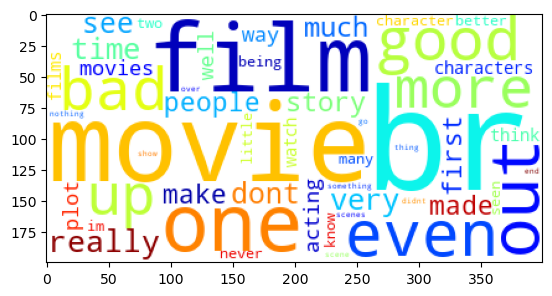

In [206]:
negcloud.generate_from_frequencies(neg_df['Negative'])
plt.imshow(negcloud)
plt.show()

In [207]:
# We can use the same way to represent the positive words
poscloud = WordCloud(max_words=50,background_color='white',colormap='jet')

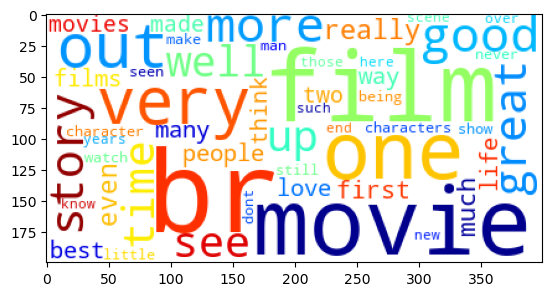

In [209]:
poscloud.generate_from_frequencies(pos_df['Positive'])
plt.imshow(poscloud)
plt.show()

## 4. Using Naive Bayes Classifier

As we mentioned before, we already know what is Naive Bayes Classifer, we can try to implemnt it to classify
a mobie review as positive or negative given the text of the review. 
Here are some steps which we can process the reviews.
* 1) we can utilize the "steps_words" file to take off the common words
* 2) We can take off the HTML tags and cleaning the reviews
* 3) Try to initializes probabilities with class priors 
* 4) For each review, we can adds its log probability
* 5) Returns the class with higher probability

In [187]:
# Create the function with all paramter
# Classify a review as positive or negative using Naive Bayes
def classify_review(text, pos_vocab, neg_vocab, pos_default, neg_default, prior_pos, prior_neg, stopwords):
    # Clean the text by using "stop_words"
    clears = clean_text(text, stopwords)
    
    # Initialize with log priors
    log_prob_pos = np.log(prior_pos)
    log_prob_neg = np.log(prior_neg)
    
    # Add log probabilities for each word
    for word in clears:
        log_prob_pos += pos_vocab.get(word, {}).get('log_prob', pos_default)
        log_prob_neg += neg_vocab.get(word, {}).get('log_prob', neg_default)
    # compare the log proability 
    return 'positive' if log_prob_pos > log_prob_neg else 'negative'


In [188]:
# Test classification with a sample review
sample_review = test_set.iloc[0]['review']
prediction = classify_review(sample_review, pos_df, neg_df, pos_default, neg_default, prior_pos, prior_neg, stopwordlst)
actual = test_set.iloc[0]['sentiment']

In [189]:
# Try to print out the classifier result 
print("\nSample Classification Test:")
print(f"Review: {sample_review[:100]}...")
print(f"Actual sentiment: {actual}, Predicted sentiment: {prediction}")


Sample Classification Test:
Review: Immediately after renting and watching this movie several years ago, a friend and I decided that it ...
Actual sentiment: negative, Predicted sentiment: negative


## 5. Analyze the classifier

We use Naive Bayes classifier to classify movie reviews, 
We can also analyze the performance of the classifier. For example, how accurate the classification is depends on the size of the training set,
What percentage of the test data is correctly categorized, and so on. We'll explore this below.
* First, we want to know what percentage of the test data is correctly categorized.

In [190]:
# create a function to evaluate the classifier.
def evaluate_classifier(test_df, classifier_func, *args):
 
    correct = 0
    # create a empty list 
    predictions = []
    # create a loop to looping each row from the testing dataset
    for _, row in test_df.iterrows():
        pred = classifier_func(row['review'], *args)
        # Append the each preducation at the list
        predictions.append(pred)
        # We have to check does they match each other
        if pred == row['sentiment']:
            correct += 1
    # We also need to calculate the accuracy to help us visualize
    accuracy = correct / len(test_df)
    # Print out statement 
    print(f"\nClassifier Accuracy: {accuracy:.2%}")
    # Add predictions to test_df for analysis
    test_df = test_df.copy()
    test_df['prediction'] = predictions
    return test_df, accuracy



In [191]:
test_df # We can see the test dataframe

,review,sentiment,prediction
6868,Immediately after renting and watching this mo...,negative,negative
24016,"This was a highly original decent movie, and a...",positive,negative
9668,I do not watch much television and came across...,negative,negative
13640,7 if you're a kid- 6 if you claim to be an adu...,positive,negative
14018,I think I agree that a lot of the comments her...,negative,negative
...,...,...,...
8670,Scoop *** out of **** Woody Allen is definitel...,positive,negative
11839,Richard Attenborough who already given us magn...,positive,negative
4013,"This was different, that's for sure. Just look...",positive,negative
21147,Moon Child was one of the more symbolic movies...,positive,negative


In [192]:
# Evaluate the classifier with differernt elements, I try to choose all the elements.
test_df, accuracy = evaluate_classifier(
    test_set,     # testing set
    classify_review, 
    pos_df, 
    neg_df,      
    pos_log,      # Positive log probability
    neg_log,      # negative log probability
    prior_pos,    # Prior probability of positive review
    prior_neg,    # Prior probability of negative review
    stopwordlst   # Stepwords to exclude
)


Classifier Accuracy: 50.58%


We try to evaluate the accuracy of our classifer with different elements which are:
* Positive/negative log probability
* Prior probability of positive/negative review
* Stepwords to exclude
* testing dataset
* Dataframe for positive/negative
And we can see the Classifier Accuracy is 50.58%

# Conclusion

In this project, we can implemented a $Naive$ $Bayes$ $Classifier$ to predict movie revews are psoitive or negative successfully.
At first, we spliting the big dataset into training data set and testing data set. And processed 25,000 mvie reviews, then cleaning test while removing stopwords.
At the same time, we also applied Laplace smoothing(Add-one smoothing) to help us avoid breaking the model.Moreover,
we also try to analysis the classifier performance on testing data. Then, we can use the words cloud to visualized words for nagetive and positive terms.


We also explored how to make the classifier work by calculating the log probabilities with Laplace Smoothing for positive/negative reviews by calculating their lexical frequency of occurrence separately to determine the baseline distribution. It is also possible to see what the most common positive and negative words are by looking at the results. Through this project, we can see that the Naive Bayes Classifier is a powerful analyzing tool. In the future, we can deploy a web app by training dataset and testing data set, which can be used for sentiment analysis or physical health analysis. Just give it detailed analysis information like “positive”, “negative”, “healthy”, “unhealthy”.

## Citation:

* MTH448Lec21
* MTH448Lec19